In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


# Import necessary libraries¶


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df=pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")

# Basic Data Exploration

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
df.shape  # Dataset Shape

(40000, 25)

In [7]:
df.describe()   # Statistics
    

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


# Data Cleaning

In [8]:
df.isnull().sum()  # Missing Values

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [9]:
df.dropna(inplace=True)  # Handling Missing Values

In [10]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [11]:
df.shape

(1237, 25)

In [12]:
df.duplicated().sum() 

0

In [13]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
46,2023-05-16 13:01:56,170.211.138.30,172.97.181.148,25022,6593,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,...,Blocked,High,Aradhya Kamdar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,Segment A,"Amravati, Kerala",95.170.137.42,Log Data,Alert Data,Firewall
97,2021-10-25 04:23:15,129.189.216.143,197.202.27.160,19199,27928,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,...,Ignored,High,Ira Kapadia,Mozilla/5.0 (compatible; MSIE 8.0; Windows 95;...,Segment C,"Tirunelveli, Gujarat",57.192.174.154,Log Data,Alert Data,Server
105,2022-10-30 05:51:47,62.75.113.77,216.196.28.158,42864,48696,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,...,Blocked,Low,Arnav Krish,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment C,"Ranchi, Sikkim",199.194.2.180,Log Data,Alert Data,Server


# Data Visualization

In [14]:
df['Payload Data'].dtype

dtype('O')

In [15]:
# Convert your_data to a string

text = str(df['Payload Data'])  


**Word Cloud**

In [16]:
from wordcloud import WordCloud

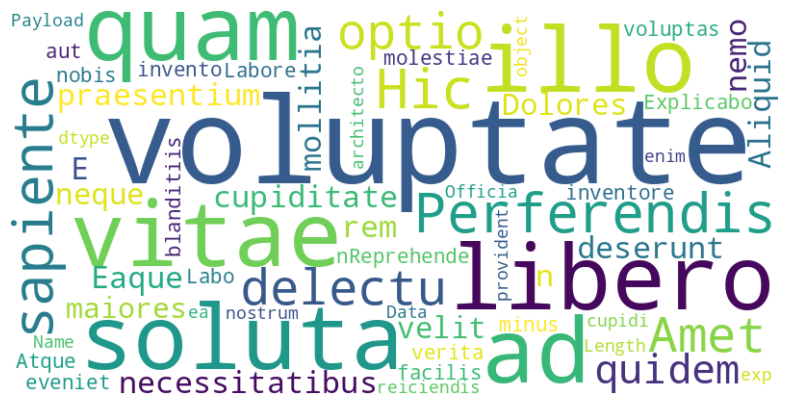

In [17]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Bar Chart**

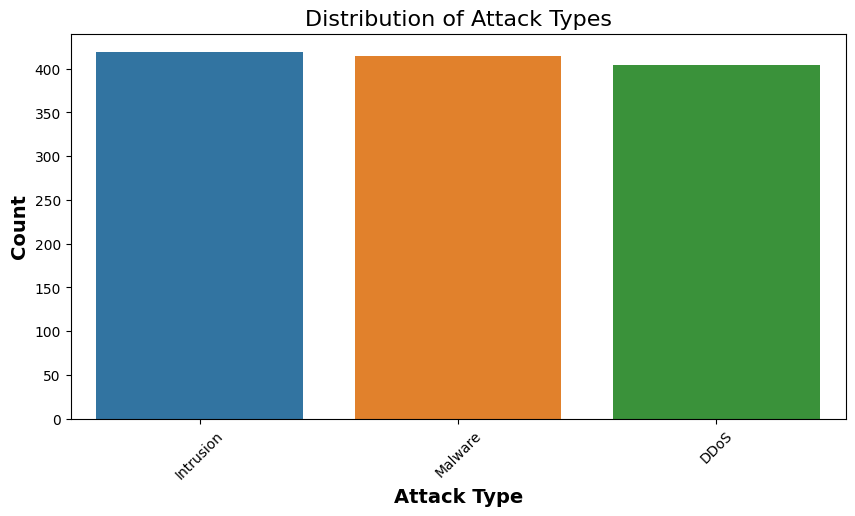

Attack Type
Intrusion    419
Malware      414
DDoS         404
Name: count, dtype: int64


In [18]:
# Visualize the distribution of attack types

attack_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

plt.xticks(rotation=45)
plt.show()

print(attack_counts)

**Pie Charts**

In [19]:
df['Protocol'].value_counts()

Protocol
UDP     422
ICMP    421
TCP     394
Name: count, dtype: int64

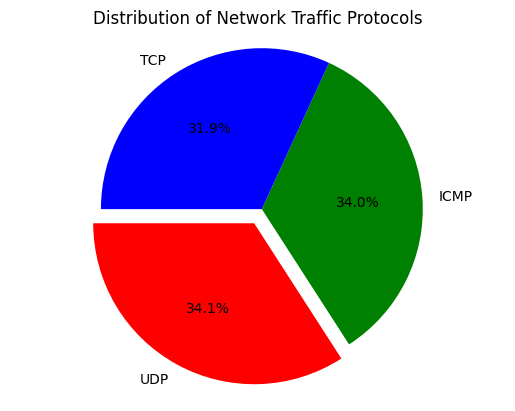

In [20]:
# Data for the pie chart


labels = ['UDP', 'ICMP', 'TCP']
sizes = df['Protocol'].value_counts()  # Proportional sizes of each category
colors = ['red', 'green', 'blue']  # Color for each category segment
explode = (0.1, 0, 0)  # Explode a slice if needed (0 means no explosion)


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Network Traffic Protocols')


# Display the pie chart
plt.show()


In [21]:
df['Traffic Type'].value_counts()

Traffic Type
DNS     424
FTP     414
HTTP    399
Name: count, dtype: int64

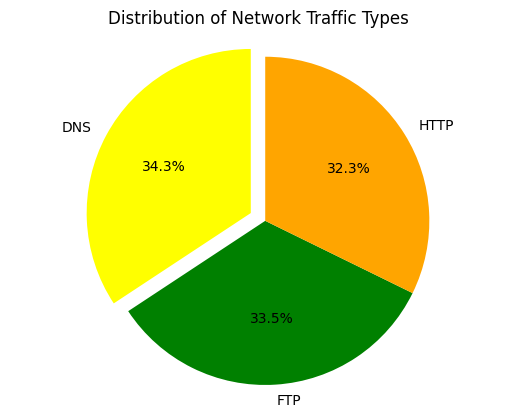

In [22]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0) 

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  
plt.title('Distribution of Network Traffic Types')

# Display the pie chart
plt.show()

In [23]:
df['Action Taken'].value_counts()

Action Taken
Blocked    420
Ignored    413
Logged     404
Name: count, dtype: int64

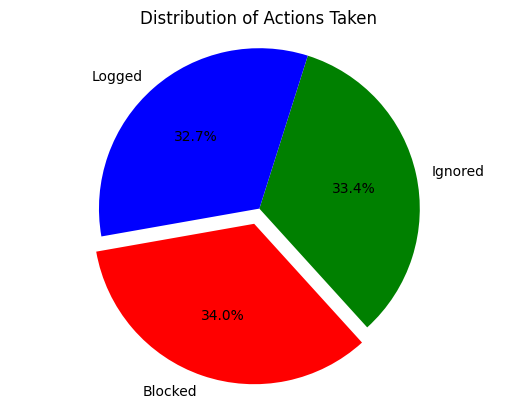

In [24]:
labels =['Blocked','Ignored','Logged']
sizes =df['Action Taken'].value_counts()
colors = ['Red', 'green', 'blue']
explode = (0.1, 0, 0) 


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=190)

plt.axis('equal')
plt.title('Distribution of Actions Taken')

# Display the pie chart
plt.show()

In [25]:
df['Packet Type'].value_counts()

Packet Type
Data       619
Control    618
Name: count, dtype: int64

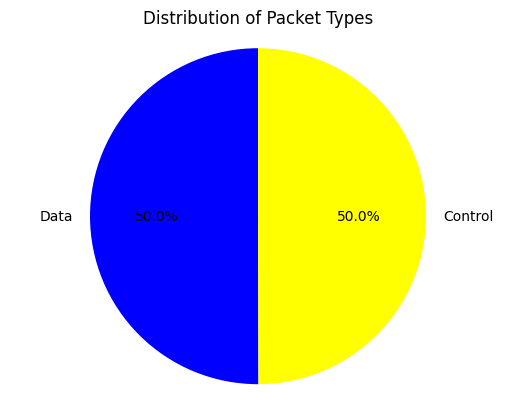

In [26]:
# Data for the pie chart
labels =['Data','Control']
sizes = df['Packet Type'].value_counts() 
colors = ['blue', 'yellow']
explode = (0, 0) 

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)


plt.axis('equal') 
plt.title('Distribution of Packet Types')

# Display the pie chart
plt.show()

In [27]:
df['Severity Level'].value_counts()

Severity Level
High      438
Medium    406
Low       393
Name: count, dtype: int64

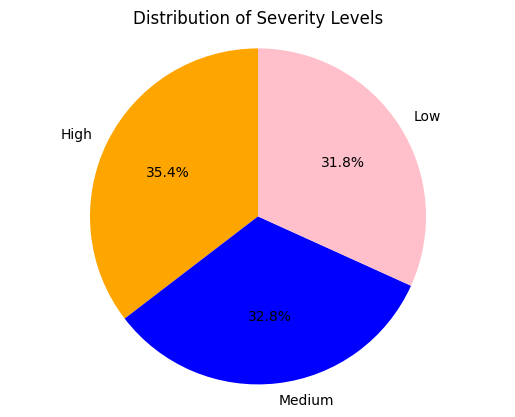

In [28]:
# Data for the pie chart
labels =['High','Medium','Low']
sizes =df['Severity Level'].value_counts()
colors = ['orange', 'blue','pink'] 
explode = (0, 0,0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.title('Distribution of Severity Levels')

# Display the pie chart
plt.show()

In [29]:
df['Log Source'].value_counts()

Log Source
Server      623
Firewall    614
Name: count, dtype: int64

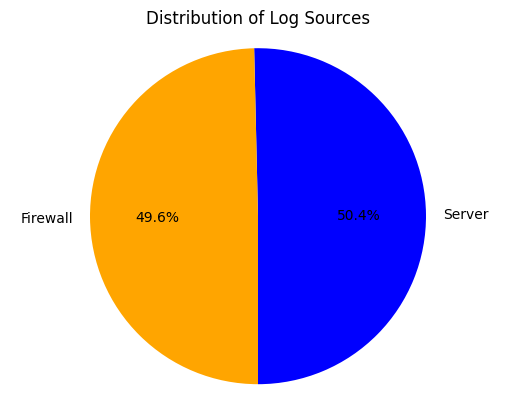

In [30]:

labels =['Server','Firewall']
sizes =df['Log Source'].value_counts()  
colors = ['blue', 'orange']
explode = (0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=270)

plt.axis('equal')
plt.title('Distribution of Log Sources')

# Display the pie chart
plt.show()